##**Load Dataset**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,precision_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
data=pd.read_csv('creditcard.csv')

In [50]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data Analysis**

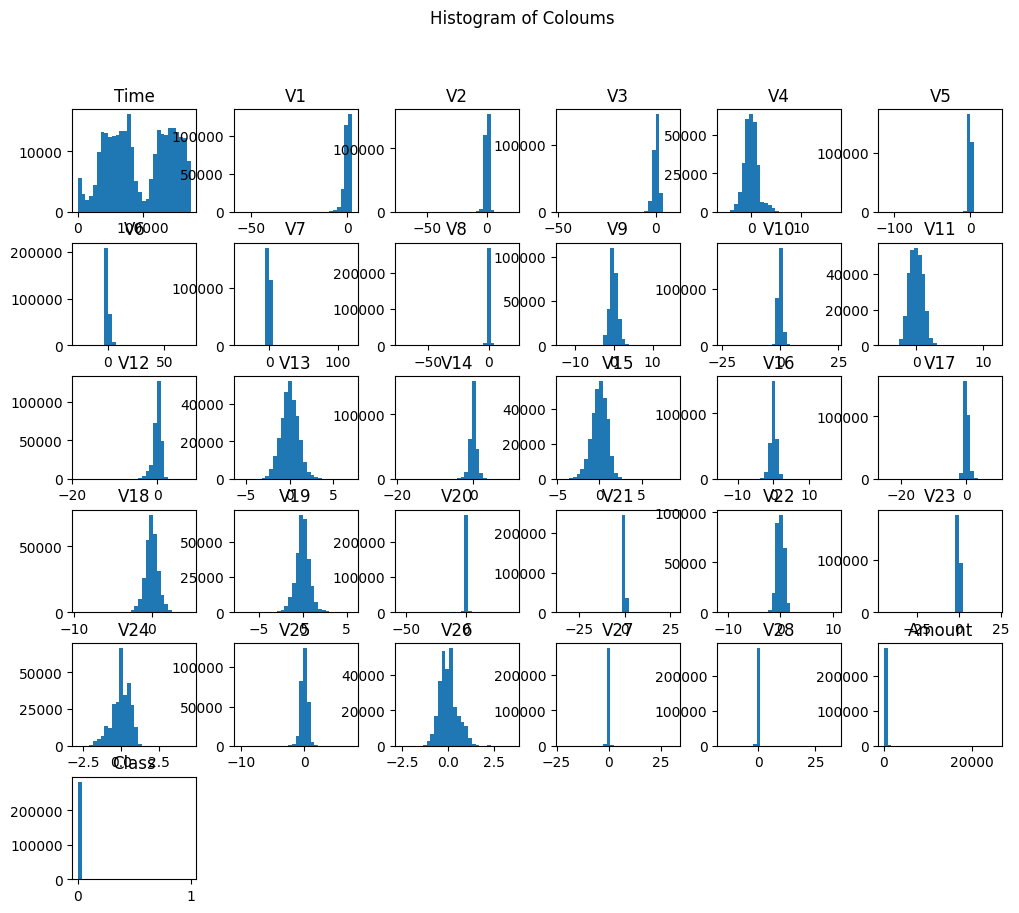

In [51]:
data.hist(bins=30,figsize=(12,10), grid = False)
plt.suptitle('Histogram of Coloums')
plt.show()

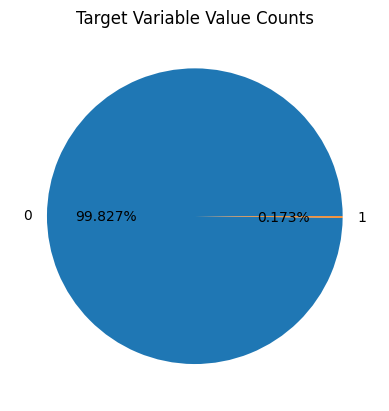

Class
0    284315
1       492
Name: count, dtype: int64


In [52]:
import matplotlib.pyplot as plt

# Check for and handle missing values
if data['Class'].isna().sum() > 0:
    print(f"Missing values found in 'Class': {data['Class'].isna().sum()}")
    data = data.dropna(subset=['Class'])  # Remove rows with missing 'Class'

# Compute value counts for labels
value_counts = data['Class'].value_counts()

# Extract labels and sizes based on value counts
labels = value_counts.index  # Index contains the actual labels
sizes = value_counts.values  # Values contain the counts

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')  # Match labels and sizes
ax.set_title('Target Variable Value Counts')
plt.show()

# Print the value counts
print(value_counts)

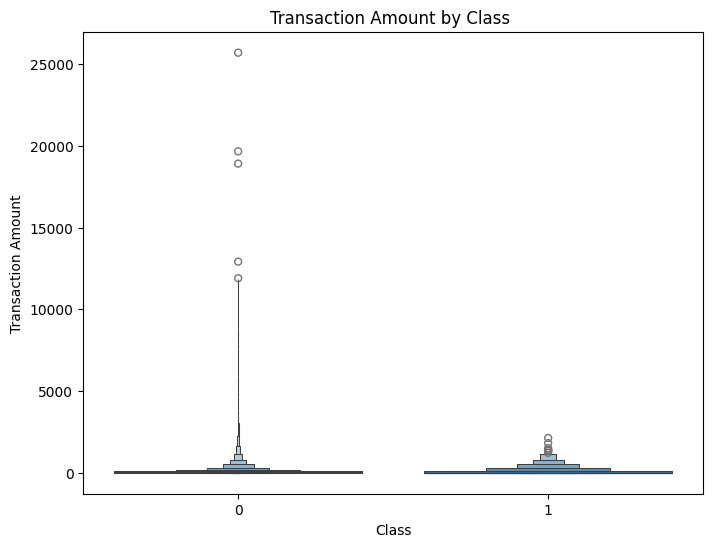

In [53]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=data, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

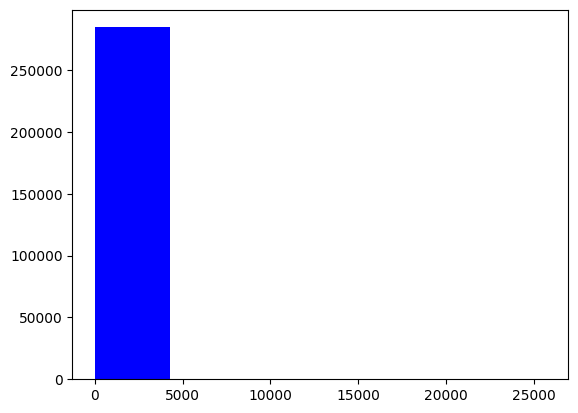

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [54]:
plt.hist(data.Amount.values, 6, histtype='bar', facecolor='b')
plt.show()

print("Minimum amount value is ", np.min(data.Amount.values))
print("Maximum amount value is ", np.max(data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(data.Amount.values, 90))

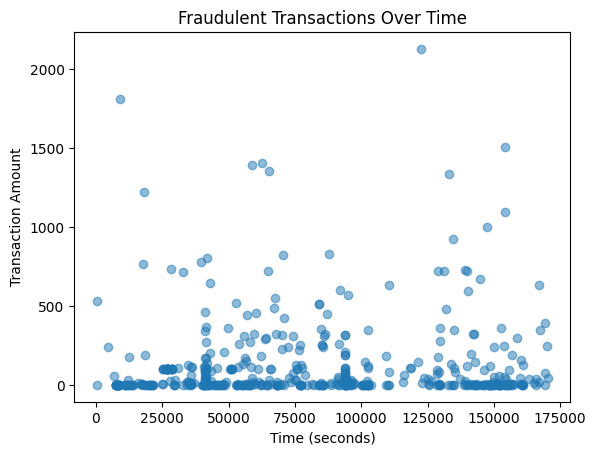

In [55]:
fraud = data[data['Class'] == 1]
plt.scatter(fraud['Time'], fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

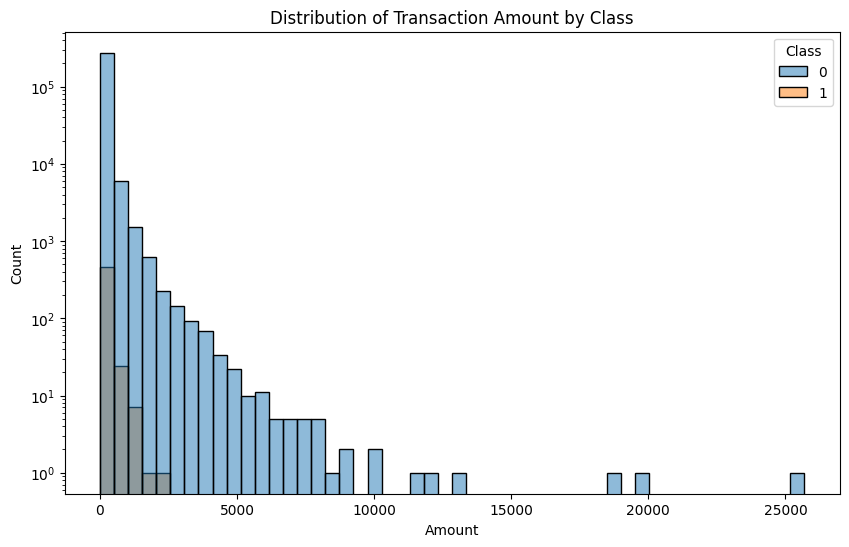

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Amount', hue='Class', bins=50)
plt.title('Distribution of Transaction Amount by Class')
plt.yscale('log')
plt.show()

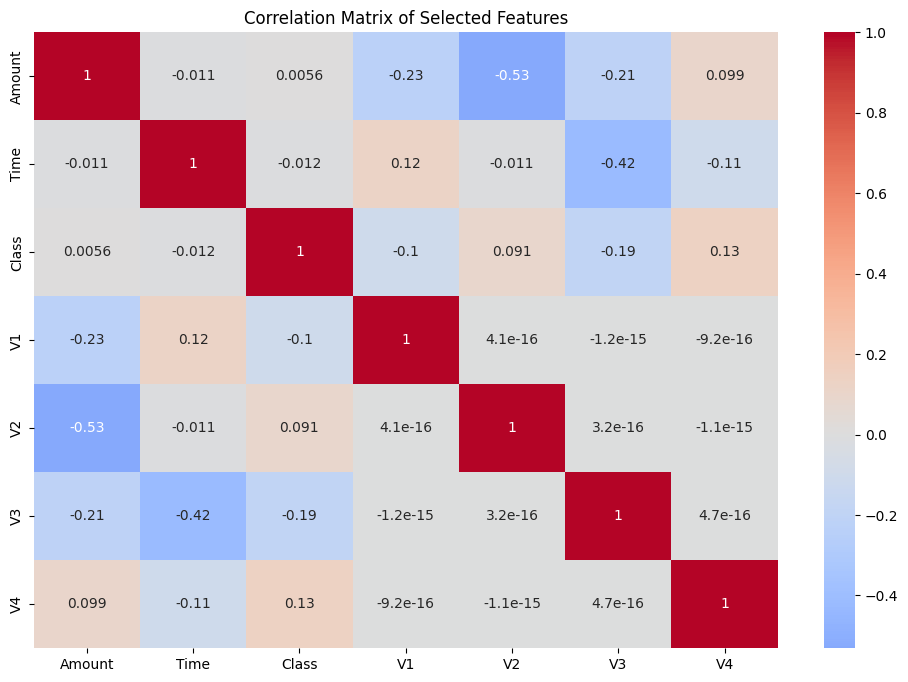

In [57]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Amount', 'Time', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# **Preprocessing**

In [32]:
data.shape

(13953, 31)

In [33]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13953 entries, 0 to 13952
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13953 non-null  int64  
 1   V1      13953 non-null  float64
 2   V2      13953 non-null  float64
 3   V3      13953 non-null  float64
 4   V4      13953 non-null  float64
 5   V5      13953 non-null  float64
 6   V6      13953 non-null  float64
 7   V7      13953 non-null  float64
 8   V8      13953 non-null  float64
 9   V9      13953 non-null  float64
 10  V10     13953 non-null  float64
 11  V11     13953 non-null  float64
 12  V12     13953 non-null  float64
 13  V13     13953 non-null  float64
 14  V14     13953 non-null  float64
 15  V15     13953 non-null  float64
 16  V16     13953 non-null  float64
 17  V17     13953 non-null  float64
 18  V18     13953 non-null  float64
 19  V19     13953 non-null  float64
 20  V20     13953 non-null  float64
 21  V21     13953 non-null  float64
 22  V22

In [35]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,...,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000,13953.000000
mean,10120.112736,-0.235197,0.283888,0.846226,0.302903,-0.118679,0.128047,-0.157336,-0.016176,0.989459,...,-0.067941,-0.157402,-0.035600,0.011196,0.116957,0.035549,0.012711,0.002134,63.882442,0.004013
std,7738.910946,1.719446,1.394057,1.561289,1.500572,1.289526,1.320437,1.238618,1.262065,1.213306,...,0.873900,0.621813,0.499822,0.587229,0.427905,0.558309,0.399463,0.255715,177.887021,0.063227
min,0.000000,-27.670569,-34.607649,-24.667741,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2984.000000,-0.969733,-0.282744,0.407423,-0.623017,-0.717075,-0.624048,-0.616472,-0.182281,0.288101,...,-0.271770,-0.549720,-0.173814,-0.339656,-0.135903,-0.374626,-0.076862,-0.014862,5.490000,0.000000
50%,9086.000000,-0.319405,0.252845,0.961015,0.220137,-0.191573,-0.144198,-0.112094,0.016904,0.971387,...,-0.132302,-0.122777,-0.045042,0.060208,0.155162,-0.035782,-0.000968,0.016243,15.690000,0.000000
75%,17099.000000,1.162666,0.884662,1.607069,1.199038,0.351314,0.508506,0.421843,0.265522,1.654173,...,0.018685,0.228997,0.069744,0.392750,0.393032,0.375313,0.098500,0.072503,52.150000,0.000000
max,24759.000000,1.960497,10.558600,4.101716,11.927512,34.099309,21.393069,34.303177,10.535558,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [36]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13948,False
13949,False
13950,False
13951,False


# **Model Evaluation**

In [37]:
X=data.drop('Class',axis=1)
y=data['Class']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **Feauture Scaling**

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [40]:
X_train

array([[-0.11969904,  0.55927567, -1.0963297 , ..., -0.1026769 ,
         0.26721332,  1.20081641],
       [ 0.38326309, -0.78557208,  0.91914482, ...,  1.43155121,
         0.35254615, -0.25928652],
       [-0.21998251, -0.85227395,  0.07124333, ...,  0.82784372,
        -1.10285125, -0.34442437],
       ...,
       [-0.62137384, -0.41048622,  0.39947953, ..., -1.76061311,
        -0.18495654, -0.01997563],
       [-1.2252631 , -0.36230241,  0.23225831, ...,  0.39586151,
         1.06683614, -0.29856806],
       [-0.06421487, -0.82594525,  0.88979322, ..., -2.93716664,
         0.4450969 , -0.18662962]])

In [41]:
X_test

array([[-1.09685284,  0.79522339, -0.05202745, ..., -0.05775036,
         0.07060189, -0.37689263],
       [ 1.43287513, -0.1732822 ,  0.11215994, ...,  0.27512051,
        -0.00751576, -0.28275925],
       [-0.51378651,  0.08789866,  0.72142498, ...,  0.63212542,
         0.45107989, -0.35518301],
       ...,
       [-0.12253733,  0.71963784, -0.66744137, ..., -0.05292184,
         0.03246771, -0.09029061],
       [ 0.70039888, -1.00589153, -0.36446347, ...,  0.76829804,
        -0.71869454,  1.03423279],
       [ 1.60749306, -0.73149659,  0.7319405 , ..., -1.05144012,
        -0.09113148,  0.2146362 ]])

# **Trend Model**

In [47]:
model=RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [43]:
model.score(X_train,y_train)

0.999820820641462

In [44]:
model.score(X_test,y_test)

0.9992834109638122

In [45]:
y_pred=model.predict(X_test)

In [46]:
print('Accuracy score:',accuracy_score(y_pred,y_test))
print('precision score:',precision_score(y_pred,y_test))
print('f1 score:',f1_score(y_pred,y_test))
print('mean_sqaured_error:',mean_squared_error(y_pred,y_test))
print('mea absolute error:',mean_absolute_error(y_pred,y_test))

Accuracy score: 0.9992834109638122
precision score: 0.9090909090909091
f1 score: 0.9090909090909091
mean_sqaured_error: 0.0007165890361877463
mea absolute error: 0.0007165890361877463
